<a href="https://colab.research.google.com/github/Elias-VA/Practica_Python/blob/main/Autoencoders_replicate_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Biblioteca"""
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Lambda
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping, Callback
import time
import tensorflow as tf

"""Pre-entrenamiento"""
while True:
    try:
        # Solicitar al usuario el enlace de la imagen
        ubicacion = input('Ingrese la ubicación de la imagen:')

        # Intentar cargar la imagen desde la ubicación proporcionada
        imagen_fuente = cv2.imread(ubicacion)

        if imagen_fuente is None:
            raise FileNotFoundError("No se pudo cargar la imagen. Verifique\
            la ubicación e inténtelo de nuevo.")

        break  # Si se carga correctamente, salir del bucle

    except Exception as e:
        print("Error:", e)


#Conversion a matriz Numpy
imagen_fuente = np.array(imagen_fuente)

#Conversión a escalas a grises
imagen_fuente = cv2.cvtColor(imagen_fuente, cv2.COLOR_BGR2GRAY)

#Normalizacion de [0,1]
imagen_fuente = imagen_fuente / 255

#Tamaño de la imagen

alto, ancho = imagen_fuente.shape[:2]

print("Ancho:", ancho)
print("Alto:", alto)

#Canal de escalas a grises
imagen_fuente = imagen_fuente.reshape(alto, ancho, 1)

#Agracar lote para el modelo
imagen_fuente = np.expand_dims(imagen_fuente, axis=0)


# Definir la función de pérdida de datos aleatoria
def random_data_loss(x):
    mask = tf.random.uniform(shape=tf.shape(x)) < 0.9  # Generar una máscara binomial aleatoria con probabilidad 0.9
    return x * tf.cast(mask, tf.float32)  # Aplicar la máscara a los datos de entrada, estableciendo píxeles perdidos en cero.





"""Modelo Autoencoder con convolucionales"""
model = Sequential()
model.add(Conv2D(256, (5,5), activation='relu', padding='same', input_shape=(alto, ancho, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D((3,3), padding = 'same'))
model.add(Conv2D(64, (5,5), activation='relu', padding='same'))



model.add(Lambda(random_data_loss))  # Capa Lambda para pérdida de datos aleatoria
model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
model.add(UpSampling2D((3,3)))
model.add(Conv2D(128, (5,5), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(128, (5,5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64, (5,5), activation='relu', padding='same'))

model.add(Conv2D(1, (5,5), activation= 'sigmoid', padding = 'same'))

#Copilador para el emtrenamiento
model.compile(optimizer = 'adam', loss='mse' )

#Resumen del modelo
model.summary()


class CustomEarlyStopping(Callback):
    def __init__(self, target_loss):
        super(CustomEarlyStopping, self).__init__()
        self.target_loss = target_loss

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get("loss")
        if current_loss is not None and current_loss <= self.target_loss:
            print(f"Epoch {epoch}: Reached target loss of {self.target_loss}. Stopping training.")
            self.model.stop_training = True




# Definir un callback personalizado para visualizar la imagen durante el entrenamiento
class ImageCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 100 == 0:  # Actualizar cada 10 épocas, ajusta según necesites
            imagen_creada = self.model.predict(imagen_fuente)
            imagen_creada = imagen_creada.reshape(alto, ancho)
            plt.imshow(imagen_creada, cmap='gray')
            plt.title(f'Imagen replicada en la época {epoch}')
            plt.show()


"""Entrenamiento del modelo"""
# Definir EarlyStopping callback
custom_early_stopping = CustomEarlyStopping(target_loss = 0.0001)
image_callback = ImageCallback()

# Medir el tiempo de entrenamiento
start_time = time.time()


# Entrenamiento del modelo con EarlyStopping
history = model.fit(imagen_fuente, imagen_fuente, epochs=5000, batch_size=1, shuffle=True, verbose=0, callbacks=[custom_early_stopping, image_callback])

# Calcular el tiempo de entrenamiento
end_time = time.time()
training_duration = end_time - start_time
print(f"El tiempo total de entrenamiento fue de {training_duration} segundos. \n")



# Obtener y visualizar el valor de pérdida numéricamente
ultimo_valor_loss = history.history['loss'][-1]
print(f"El valor final de pérdida (loss) es: {ultimo_valor_loss} \n")



# Imprimir todo el historial de pérdidas
print("Historial de pérdidas:", history.history['loss'])


# Imprimir el número total de épocas entrenadas
total_epochs = len(history.history['loss'])
print(f"El número total de épocas entrenadas es: {total_epochs}")



Ingrese la ubicación de la imagen:h
Error: No se pudo cargar la imagen. Verifique            la ubicación e inténtelo de nuevo.


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-b8153e5825fb>", line 16, in <cell line: 13>
    ubicacion = input('Ingrese la ubicación de la imagen:')
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 851, in raw_input
    return self._input_request(str(prompt),
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 895, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

TypeError: object of type 'NoneType' has no len()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Matriz de la imagen replicada [[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [1.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]] 



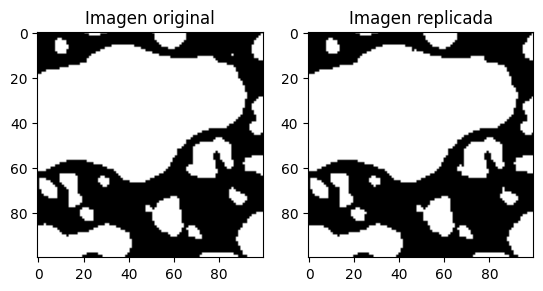

In [ ]:
#Prediccion
imagen_creada = model.predict(imagen_fuente)
print('Matriz de la imagen replicada',imagen_creada, '\n')





"""Vizualizaciones de las imagenes"""
#Redimensionar las imagenes
imagen_fuente = imagen_fuente.reshape(alto, ancho)
imagen_creada = imagen_creada.reshape(alto, ancho)


# Visualización de las dos imágenes (fuente y creada)
plt.subplot(1, 2, 1)
plt.imshow(imagen_fuente, cmap='gray')
plt.title('Imagen original')

plt.subplot(1, 2, 2)
plt.imshow(imagen_creada, cmap='gray')
plt.title('Imagen replicada')

plt.show()

"""Imagen diferencia"""

#Diferencia entre las imagenes
imagen_diferencia =np.abs(imagen_fuente - imagen_creada)

#Confirmación de matriz Numpy de  imagen diferencia}
imagen_diferencia = np.array(imagen_diferencia)



Valor mínimo de la imagen diferencia: 0.0
Valor máximo de la imagen diferenica: 1.0


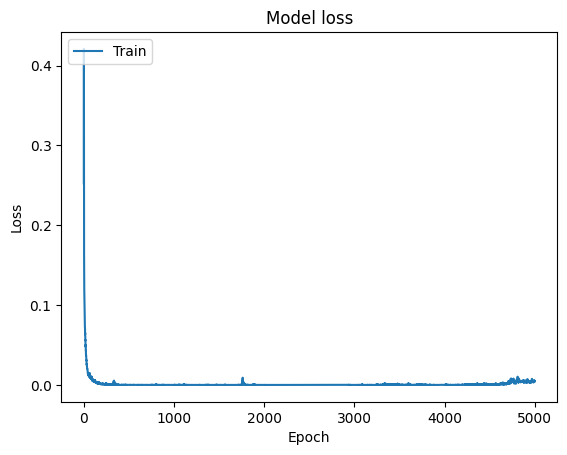

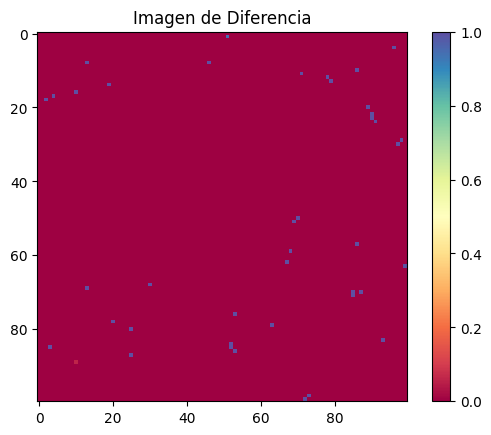

La porosidad total de la imagen original es 0.5702
La porosidad total en porcentaje de la imagen original es 57.02% 

La porosidad total de la imagen replicada es 0.5667
La porosidad total en porcentaje de la imagen replicada es 56.67% 

El promedio de las diferencias es : 0.004100055106549145 

El error relativo de la imagen creada es 0.005806967401788846
El error relativo en porcentaje de la imagen creada es 0.5806967401788846% 

El la diferencia entre las porosidades es 0.0035000000000000586 

El error relativo de la porosidad es 0.006138197123816307


KeyboardInterrupt: Interrupted by user

In [ ]:


# Obtener los valores mínimos y máximos de la imagen de diferencia
minvalor = np.min(imagen_diferencia)
maxvalor = np.max(imagen_diferencia)
print(f"Valor mínimo de la imagen diferencia: {minvalor}")
print(f"Valor máximo de la imagen diferenica: {maxvalor}")

#Visualizacion de la grafica loss
plt.figure()
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


#Visualización de la imagen_Diferencia

plt.figure()
plt.title('Imagen de Diferencia')
plt.imshow(imagen_diferencia,cmap='Spectral')

plt.colorbar()

plt.show()



"""Calculo de la porosidad"""

#Porosidad imagen original
phi_fuente = np.sum(imagen_fuente ==1) / (np.sum(imagen_fuente == 0) + np.sum(imagen_fuente == 1))
print(f'La porosidad total de la imagen original es {phi_fuente}')
print(f"La porosidad total en porcentaje de la imagen original es {phi_fuente*100}% \n")


#Porosidad imagen replicada
phi_creada = np.sum(imagen_creada >0.99) / (np.sum(imagen_fuente == 0) + np.sum(imagen_fuente == 1))
print(f'La porosidad total de la imagen replicada es {phi_creada}')
print(f"La porosidad total en porcentaje de la imagen replicada es {phi_creada*100}% \n")




"""Calculo de errores de imagenes"""
#Error absoluto medio (Promedio de las diferencias)
diferencia_absoluta = np.abs(imagen_fuente - imagen_creada)
suma_diferencias = np.sum(diferencia_absoluta)

total_pixeles= np.sum(imagen_fuente == 0) + np.sum(imagen_fuente == 1)
promedio_diferencia = suma_diferencias / total_pixeles
print(f"El promedio de las diferencias es : {promedio_diferencia}", "\n")

#Error relativo
error_relativo = (np.abs(np.sum(imagen_fuente) - np.sum(imagen_creada))) / np.sum(imagen_fuente)
error_relativo_porcentaje = error_relativo * 100
print(f'El error relativo de la imagen creada es {error_relativo}')
print(f'El error relativo en porcentaje de la imagen creada es {error_relativo_porcentaje}% \n')


"""Calculo de errores de la porosidad"""

#Diferencia de porosidades
error_absoluto_phi = np.abs(phi_fuente - phi_creada)
print(f'El la diferencia entre las porosidades es {error_absoluto_phi} \n')

#Error relativo
error_relativo_phi = error_absoluto_phi / phi_fuente
print(f'El error relativo de la porosidad es {error_relativo_phi}')



"""Guardar imagen replicada"""

# Redimensionar la imagen creada a valores entre 0 y 255
imagen_creada *= 255
imagen_creada = imagen_creada.astype(np.uint8)

# Guardar la imagen creada en el disco
output_image = input('Introduzca el nombre que desee que tenga la imagen replicada')
cv2.imwrite(f'/content/drive/MyDrive/Poyecto_tesis_Licenciatura/Imagenes_replicadas_Tesis/Replicado con Autoencoder/{output_image}.png', imagen_creada)

print("La imagen creada ha sido guardada correctamente \n")

